# Experiment-6:

## Aim: Color Image Segmentation Using Thresholding Techinques

## Theory:

The primary aim of this experiment is to perform color image segmentation by applying various thresholding techniques. The experiment seeks to segment objects from the background in a color image using both RGB and HSV thresholding methods. Additionally, morphological operations will be applied to enhance the segmented output.


Color image segmentation is a fundamental task in image processing, where the goal is to partition an image into regions that are homogeneous with respect to certain criteria, such as color. This process is crucial in various applications, including object detection, image retrieval, medical imaging, and industrial inspection.

**Thresholding** is one of the simplest and most commonly used techniques for image segmentation. While grayscale thresholding is limited to a single channel, color image thresholding leverages the color information across multiple channels, allowing for more precise and meaningful segmentation. By setting appropriate thresholds on these channels, regions of interest (objects) can be isolated from the background.

**Thresholding Techniques:**

**RGB Thresholding:** In this technique, the image is segmented by applying thresholds directly to the Red, Green, and Blue channels of the image.
Each channel is treated independently, and pixels that fall within the specified thresholds for all three channels are retained as part of the object, while others are classified as background.
This method is straightforward but may not always be robust to changes in lighting or object color variations.

**HSV Thresholding:** The image is first converted from the RGB color space to the HSV (Hue, Saturation, Value) color space.
Thresholds are applied to the Hue, Saturation, and Value channels to isolate objects based on their color properties.
This technique is often more effective in scenarios where the color (Hue) is the primary distinguishing feature and when lighting conditions vary, as it separates color information from intensity.

**Morphological Operations:**
After thresholding, morphological operations such as erosion, dilation, opening, and closing will be applied to the segmented image. These operations help in refining the segmentation by removing noise, filling gaps, and improving the overall shape of the segmented objects.

Erosion will be used to remove small noise points from the segmented regions.
Dilation will help in filling gaps and connecting disjointed parts of the segmented objects.
Opening and Closing will be applied to further refine the segmentation by combining erosion and dilation operations in specific sequences.

## Program:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the image
img = cv2.imread('/content/drive/MyDrive/colab for cvr/clown_fish.png')

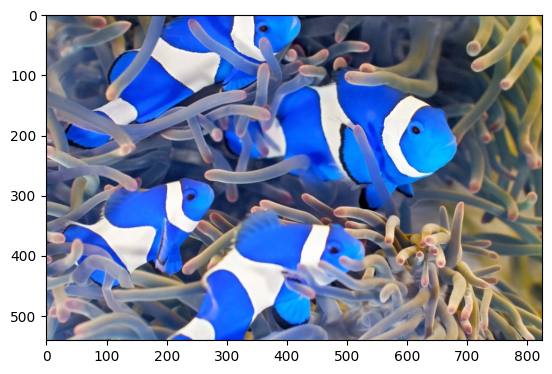

In [ ]:
plt.imshow(img)

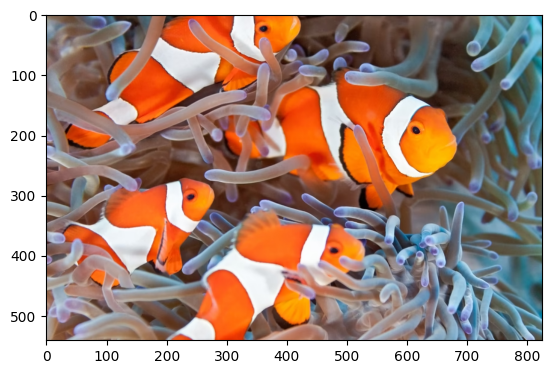

In [ ]:
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Plot 3d Scatter plot of RGB image

In [ ]:
img_rgb.shape

(541, 825, 3)

In [ ]:
#split image in individual color channel
r, g, b = cv2.split(img_rgb)

In [ ]:
r.shape

(541, 825)

In [ ]:
g.shape

(541, 825)

In [ ]:
b.shape

(541, 825)

In [ ]:
#convert 2D array into 1D array
print(r.flatten().shape)
print(g.flatten().shape)
print(b.flatten().shape)

(446325,)
(446325,)
(446325,)


In [ ]:
pixel_colors=img_rgb.reshape((-1,3))
pixel_colors.shape

(446325, 3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [ ]:
#normalize matplotlib colors
norm=colors.Normalize()

In [ ]:
#autoscale the image pixels colors values based on normalize matplotlib
norm.autoscale(pixel_colors)

In [ ]:
#convert the image
pixel_colors=norm(pixel_colors).tolist()

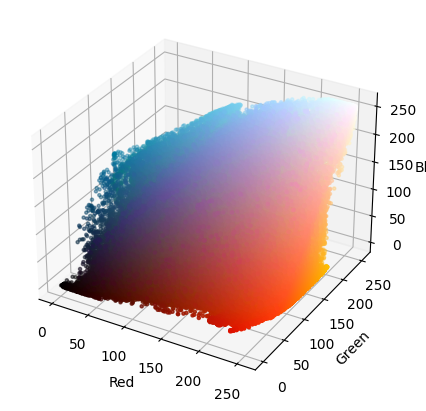

In [ ]:
#plotting the image on 3D plot
fig=plt.figure(figsize=(5,5),dpi=100)
axis=fig.add_subplot(1,1,1,projection='3d')
axis.scatter(r,g,b,facecolors=pixel_colors,marker='.')
#the facecolors parameter specifies the color of each marker
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')
plt.show()

### Convert the Image from RGB to HSV

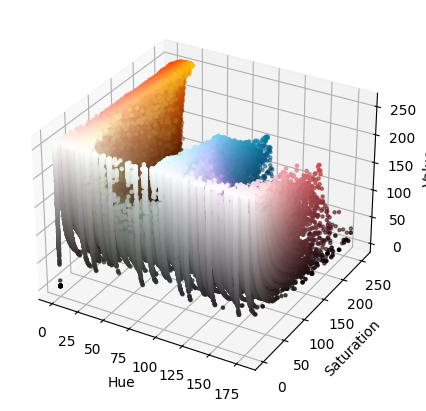

In [ ]:
img_hsv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(img_hsv)
#plotting the image on 3D plot
fig=plt.figure(figsize=(5,5),dpi=100)
axis=fig.add_subplot(1,1,1,projection='3d')
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors=pixel_colors,marker='.')
#the facecolors parameter specifies the color of each marker
axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')
plt.show()

In [ ]:
#create a mask for orage color
low_thres_orange=(0,180,100)
high_thres_orange=(25,255,255)

### Segmentation of HSV using inRange function

In [ ]:
mask_orange=cv2.inRange(img_hsv,low_thres_orange,high_thres_orange)

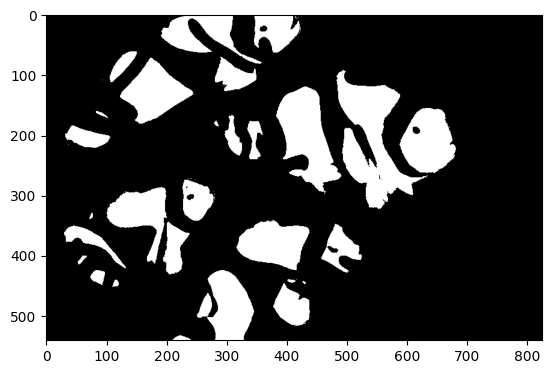

In [ ]:
plt.imshow(mask_orange,cmap='gray')

### Bitwise-AND mask and original image

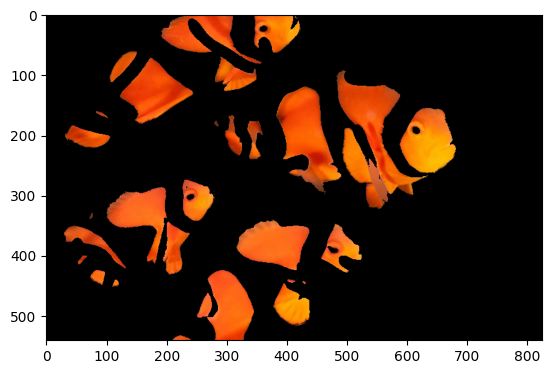

In [ ]:
orange_mask_result=cv2.bitwise_and(img_rgb,img_rgb,mask=mask_orange)
plt.imshow(orange_mask_result)

### Similarly create mask for white color of part of the fish

In [ ]:
low_thres_white=(0,0,200)
high_thres_white=(145,70,255)

In [ ]:
mask_white=cv2.inRange(img_hsv,low_thres_white,high_thres_white)

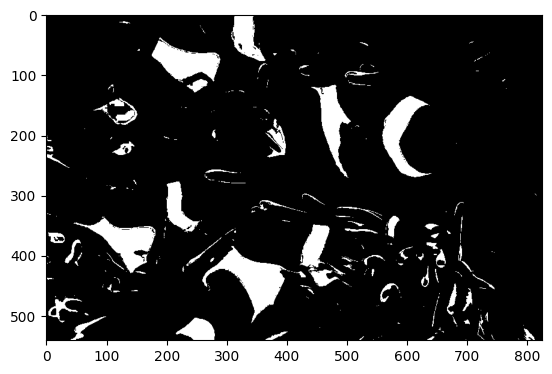

In [ ]:
plt.imshow(mask_white,cmap='gray')

### Combine both the Masks for final result

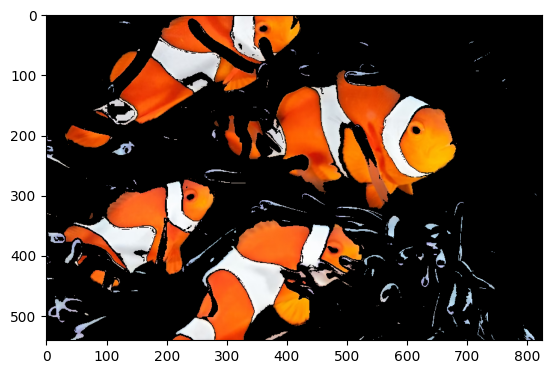

In [ ]:
final_mask=mask_orange+mask_white
final_result=cv2.bitwise_and(img_rgb,img_rgb,mask=final_mask)
plt.imshow(final_result)

# Task

1. Import "fruit.png" image
2. convert image into RGB and HSV color channel
3. Use Thresholding segmentation approach for segmentation of fruits  (foreground objects) from image
4. Use proper morphological operation to enhance the segmentation result (e.g. erosion, dilation, opening or closing operations)
5. Import "Thresh_segmentation.png" image.
6. convert image into RGB and HSV color channel
7. Use Thresholding segmentation approach for segmentation of balls  (foreground objects) from image
8. Use proper morphological operation to enhance the segmentation result (e.g. erosion, dilation, opening or closing operations)

## 1

In [ ]:
task = cv2.imread('/content/drive/MyDrive/colab for cvr/fruit.png')

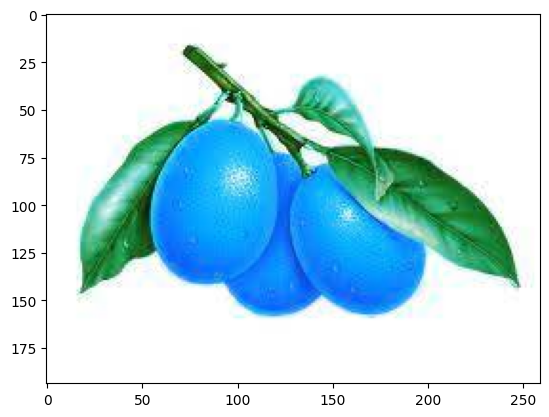

In [ ]:
plt.imshow(task)

## 2

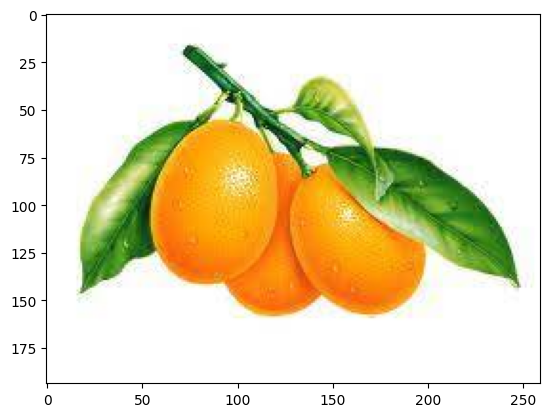

In [ ]:
task_rgb= cv2.cvtColor(task, cv2.COLOR_BGR2RGB)
plt.imshow(task_rgb)

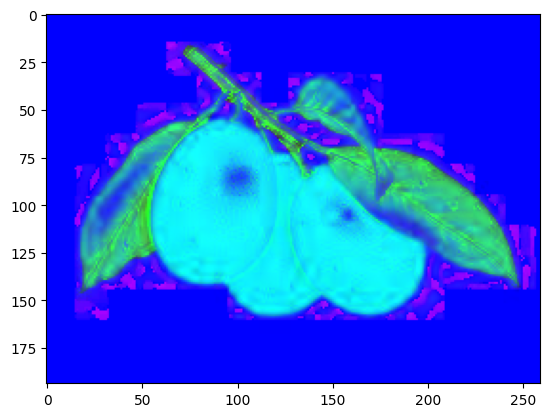

In [ ]:
task_hsv=cv2.cvtColor(task_rgb,cv2.COLOR_RGB2HSV)
plt.imshow(task_hsv)

## 3

In [ ]:
print(task_rgb.shape)

(194, 259, 3)


In [ ]:
r1,g1,b1=cv2.split(task_rgb)

In [ ]:
print(r1.flatten().shape)
print(g1.flatten().shape)
print(b1.flatten().shape)

(50246,)
(50246,)
(50246,)


In [ ]:
p_color= task_rgb.reshape((-1,3))
p_color.shape

(50246, 3)

In [ ]:
norm.autoscale(p_color)

p_color = norm(p_color).tolist()

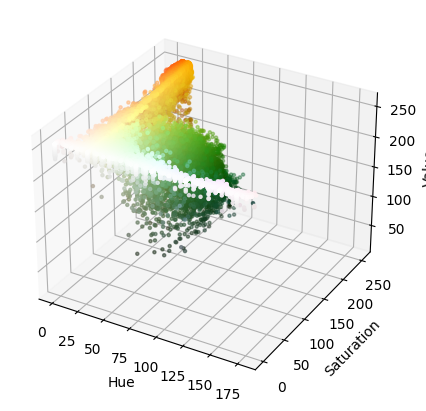

In [ ]:
task_hsv= cv2.cvtColor(task_rgb, cv2.COLOR_RGB2HSV)

h1,s1,v1= cv2.split(task_hsv)

fig = plt.figure(figsize=(5,5), dpi=100)
axis= fig.add_subplot(1,1,1, projection='3d')

axis.scatter(h1, s1, v1, facecolors=p_color, marker='.')

axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')

plt.show()

In [ ]:
upper_orange= (25,255,255)
lower_orange= (0,100,25)

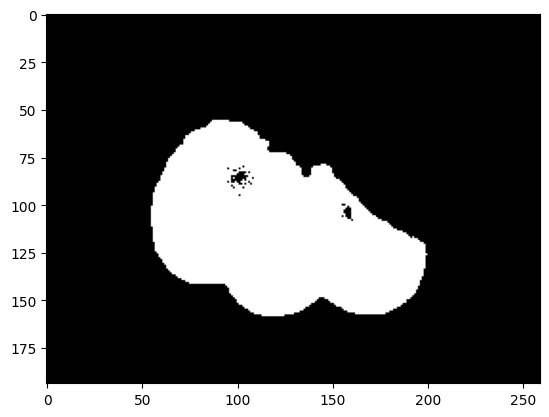

In [ ]:
fruit_mask= cv2.inRange(task_hsv, lower_orange, upper_orange)
plt.imshow( fruit_mask, cmap='gray')

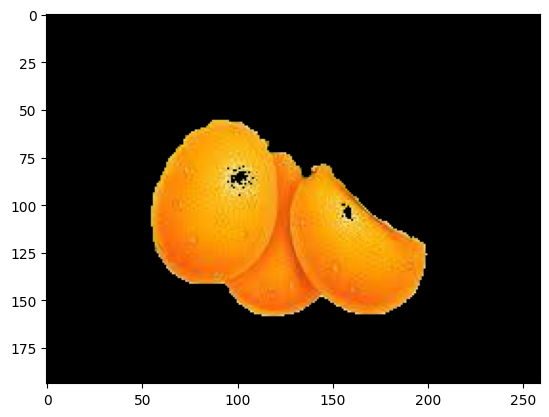

In [ ]:
fruit_mask_result=cv2.bitwise_and(task_rgb,task_rgb,mask=fruit_mask)
plt.imshow(fruit_mask_result)

In [ ]:
low_green=(25,50,100)
high_green=(125,255,255)

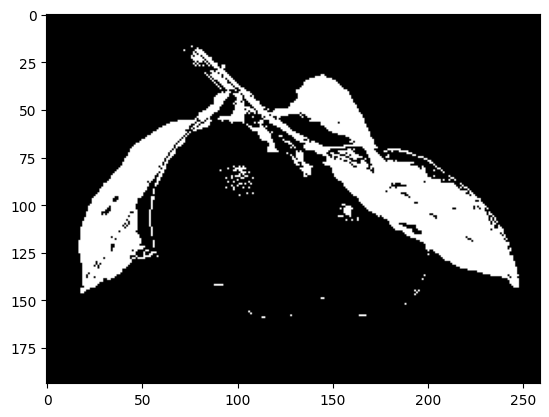

In [ ]:
mask_green=cv2.inRange(task_hsv,low_green,high_green)
plt.imshow(mask_green,cmap='gray')

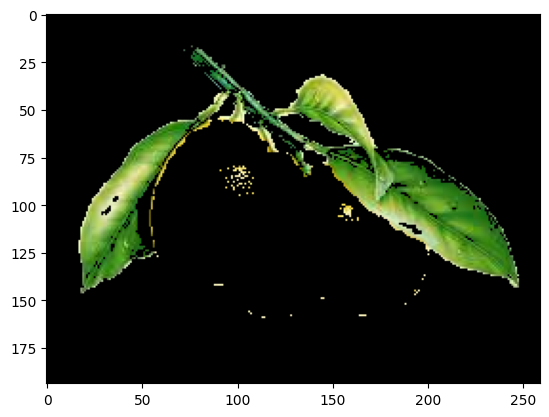

In [ ]:
leaf_mask_result=cv2.bitwise_and(task_rgb,task_rgb,mask=mask_green)
plt.imshow(leaf_mask_result)

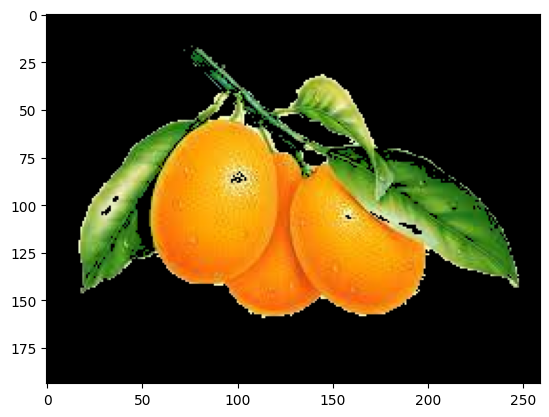

In [ ]:
fruit_final=fruit_mask+mask_green
final_result=cv2.bitwise_and(task_rgb,task_rgb,mask=fruit_final)
plt.imshow(final_result)

## 4

In [ ]:
final_gray=cv2.cvtColor(final_result,cv2.COLOR_RGB2GRAY)

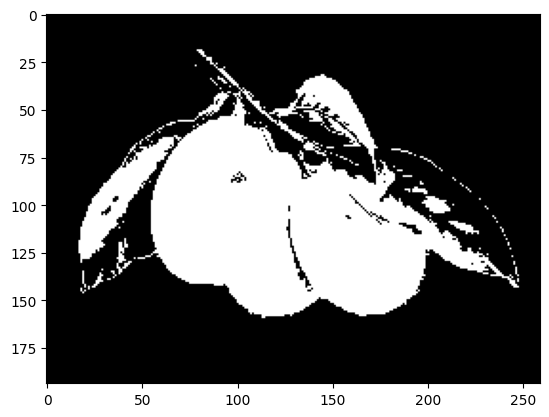

In [ ]:
thresh_value, binary_g= cv2.threshold(final_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary_g,cmap='gray')

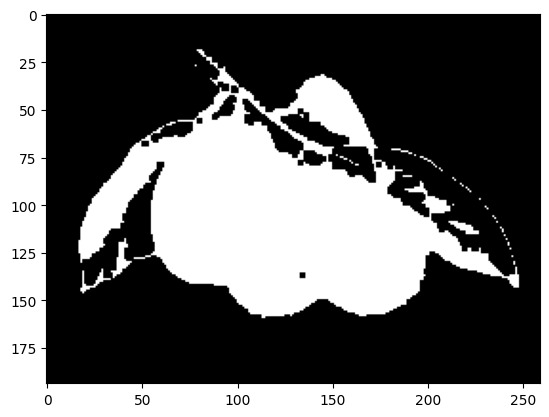

In [ ]:
kernel= np.ones((3,3))

closing_g= cv2.morphologyEx(binary_g, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_g, cmap='gray')

## 5

In [ ]:
balls= cv2.imread('/content/drive/MyDrive/colab for cvr/Thresh_segmentation.png')

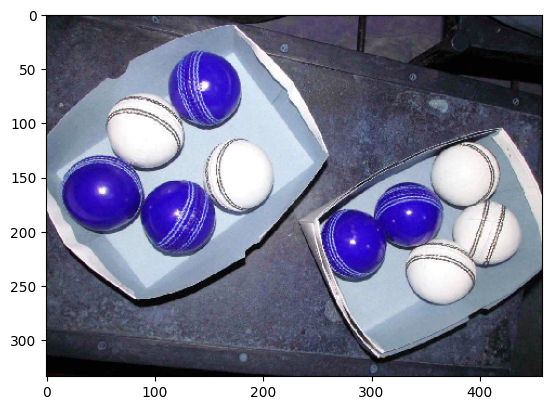

In [ ]:
plt.imshow(balls)

## 6

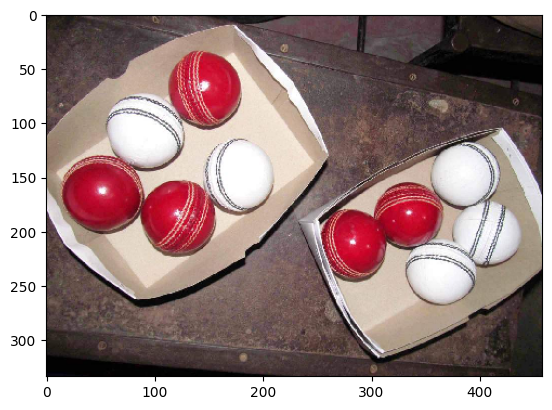

In [ ]:
balls_rgb= cv2.cvtColor(balls, cv2.COLOR_BGR2RGB)
plt.imshow(balls_rgb)

In [ ]:
r2,g2,b2=cv2.split(balls_rgb)

In [ ]:
print(balls_rgb.shape)

(334, 458, 3)


In [ ]:
print(r2.flatten().shape)
print(g2.flatten().shape)
print(b2.flatten().shape)

(152972,)
(152972,)
(152972,)


In [ ]:
p_color= balls_rgb.reshape((-1,3))
p_color.shape

(152972, 3)

In [ ]:
norm.autoscale(p_color)

p_color = norm(p_color).tolist()

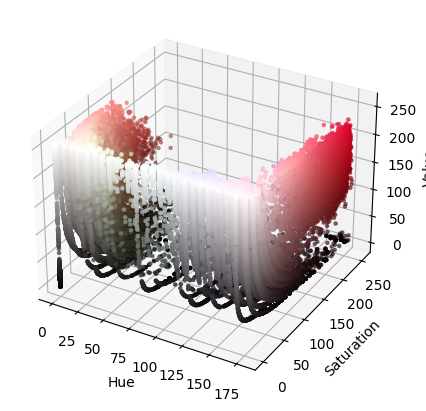

In [ ]:
balls_hsv=cv2.cvtColor(balls_rgb, cv2.COLOR_RGB2HSV)

h2,s2,v2=cv2.split(balls_hsv)

fig = plt.figure(figsize=(5,5), dpi=100)
axis= fig.add_subplot(1,1,1, projection='3d')

axis.scatter(h2, s2, v2, facecolors=p_color, marker='.')

axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')

plt.show()

## 7

In [ ]:
low_red=(130,130,50)
high_red=(200,255,220)

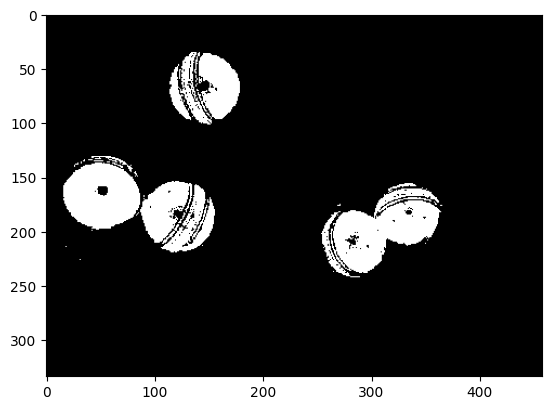

In [ ]:
red_balls_mask= cv2.inRange(balls_hsv, low_red, high_red)
plt.imshow(red_balls_mask, cmap='gray')

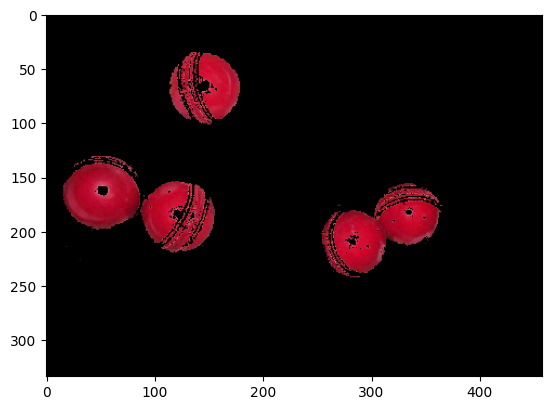

In [ ]:
red_result=cv2.bitwise_and(balls_rgb,balls_rgb,mask=red_balls_mask)
plt.imshow(red_result)

In [ ]:
low_white=(0,0,200)
high_white=(158,30,255)

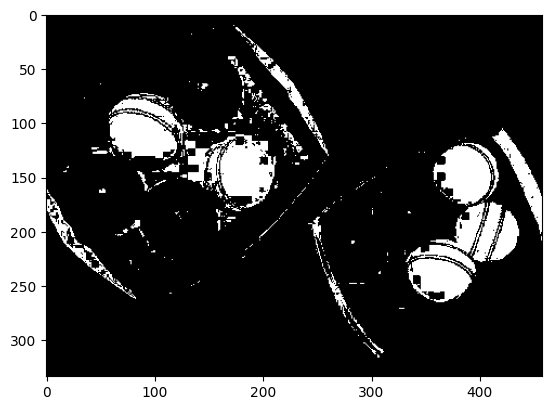

In [ ]:
white_ball_mask=cv2.inRange(balls_hsv,low_white,high_white)
plt.imshow(white_ball_mask,cmap='gray')

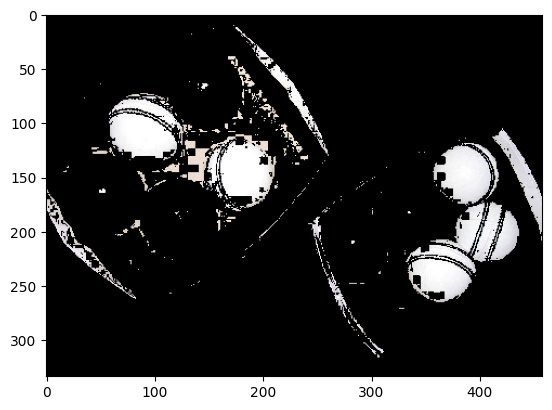

In [ ]:
white_ball_result=cv2.bitwise_and(balls_rgb,balls_rgb,mask=white_ball_mask)
plt.imshow(white_ball_result)

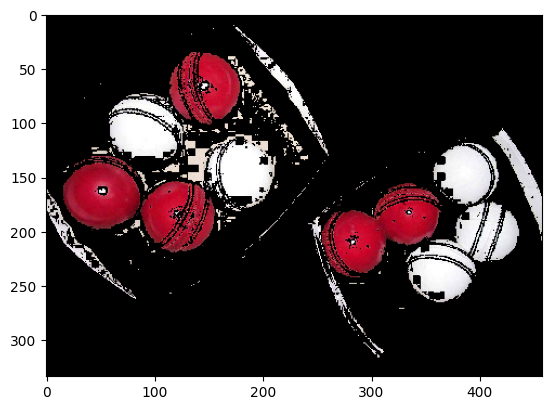

In [ ]:
balls_result=red_balls_mask+white_ball_mask
balls_final_result=cv2.bitwise_and(balls_rgb,balls_rgb,mask=balls_result)
plt.imshow(balls_final_result)


## 8

In [ ]:
balls_gray=cv2.cvtColor(balls_final_result,cv2.COLOR_RGB2GRAY)

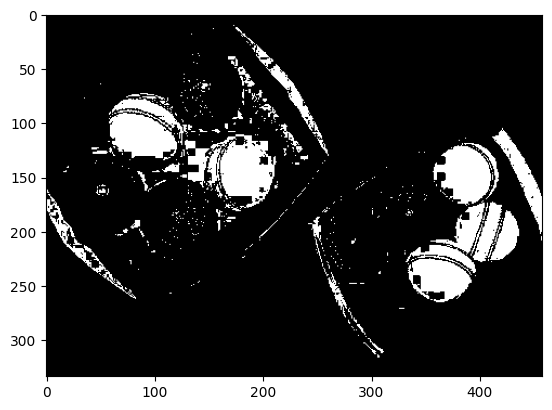

In [ ]:
t_value, binary_g= cv2.threshold(balls_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary_g,cmap='gray')

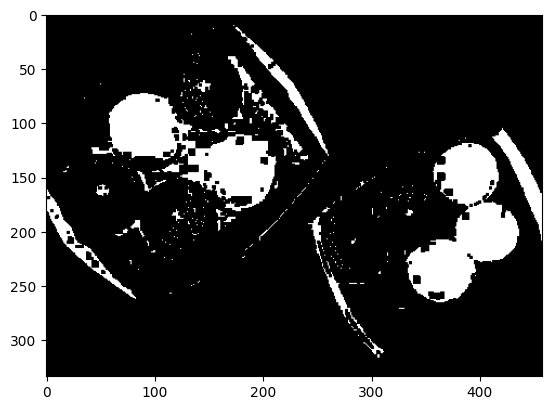

In [ ]:
k1= np.ones((3,3))

closing_g= cv2.morphologyEx(binary_g, cv2.MORPH_CLOSE, k1)
plt.imshow(closing_g, cmap='gray')

# Conclusion:

Thresholding, when applied thoughtfully with the right choice of color space and morphological operations, proves to be an effective and straightforward method for color image segmentation. Despite its limitations with complex images, it remains a valuable technique for isolating objects in various image processing applications.